In [1]:
import pandas as pd

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(13,7)
import numpy as np

# Part 1 Transformations************

In [3]:
df = pd.read_csv("airline_passengers.csv",index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

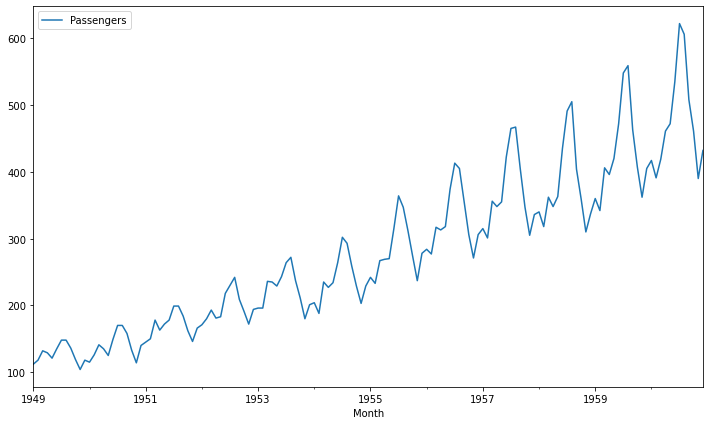

In [5]:
df.plot(figsize=(12,7))

### Now apply Transformations

In [6]:
#power transform
#sqrt
df["sqrt_pass"]= np.sqrt(df)
df.head()

,Passengers,sqrt_pass
Month,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<AxesSubplot:xlabel='Month'>

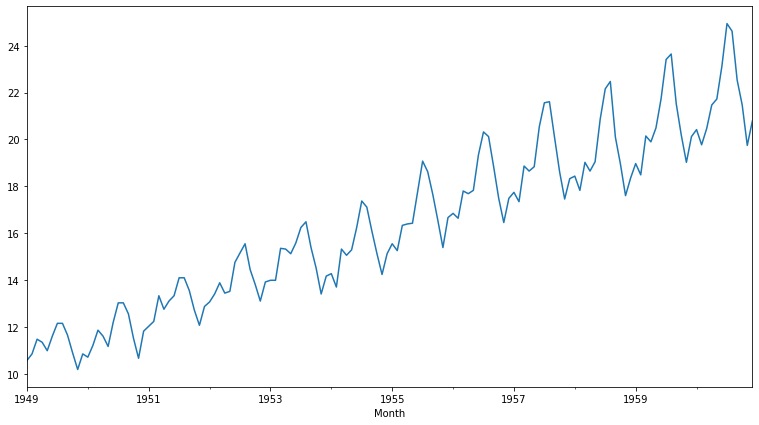

In [7]:
df.sqrt_pass.plot()

This now little bit squashed but have still high amplitude

In [8]:
# log transform
df['log_pass']= np.log(df.Passengers)
df.head()

,Passengers,sqrt_pass,log_pass
Month,,,
1949-01-01,112,10.583005,4.718499
1949-02-01,118,10.862780,4.770685
1949-03-01,132,11.489125,4.882802
1949-04-01,129,11.357817,4.859812
1949-05-01,121,11.000000,4.795791


<AxesSubplot:xlabel='Month'>

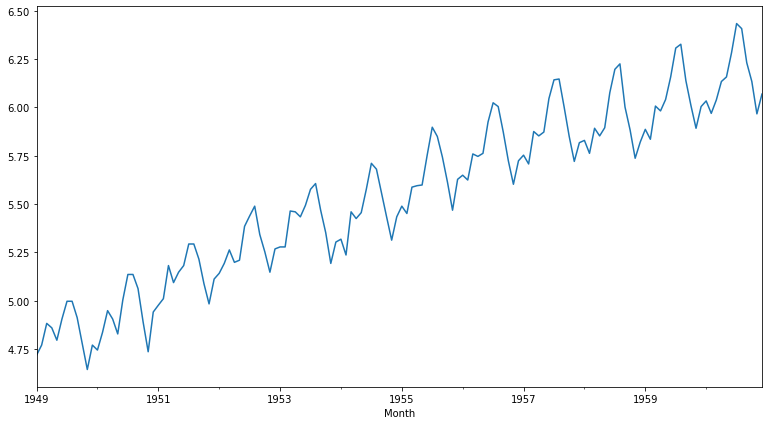

In [9]:
df.log_pass.plot()

In [10]:
from scipy.stats import boxcox

In [11]:
#BOX-COX transform
df['boxcox_pass'],lamda = boxcox(df.Passengers)
df.head()

,Passengers,sqrt_pass,log_pass,boxcox_pass
Month,,,,
1949-01-01,112,10.583005,4.718499,6.827490
1949-02-01,118,10.862780,4.770685,6.932822
1949-03-01,132,11.489125,4.882802,7.161892
1949-04-01,129,11.357817,4.859812,7.114611
1949-05-01,121,11.000000,4.795791,6.983787


In [12]:
lamda

0.14802265137037945

<AxesSubplot:xlabel='Month'>

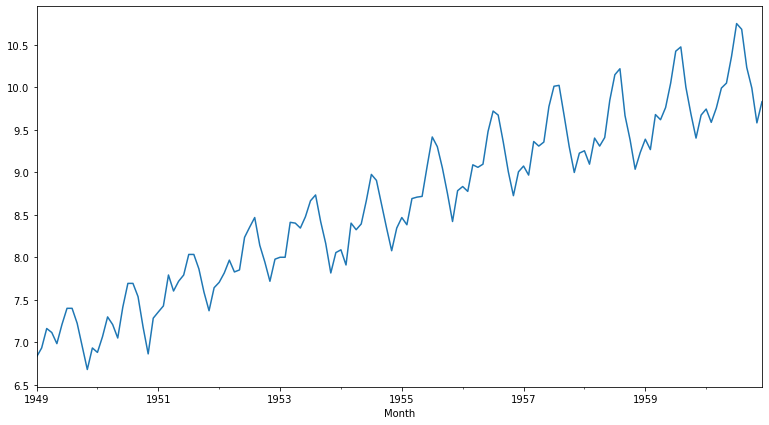

In [13]:
df.boxcox_pass.plot()

<AxesSubplot:xlabel='Month'>

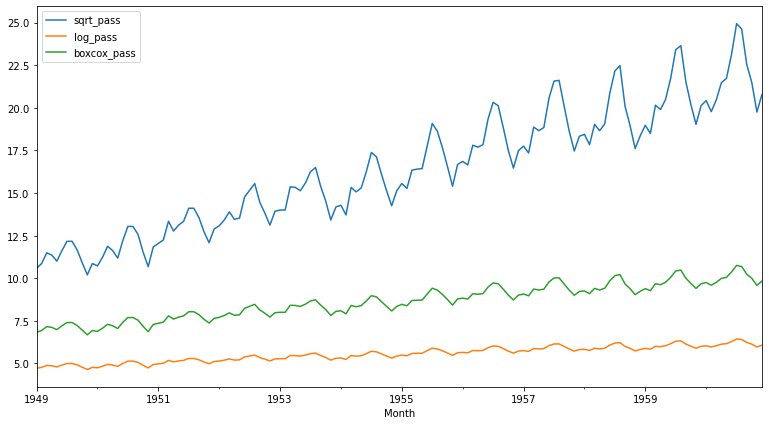

In [14]:
df[["sqrt_pass","log_pass","boxcox_pass"]].plot()

### now plot histograms

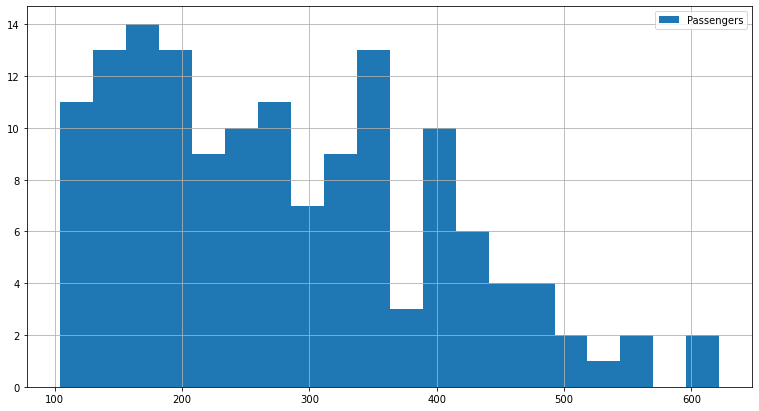

In [15]:
df.Passengers.hist(bins=20, label='Passengers')
plt.legend()

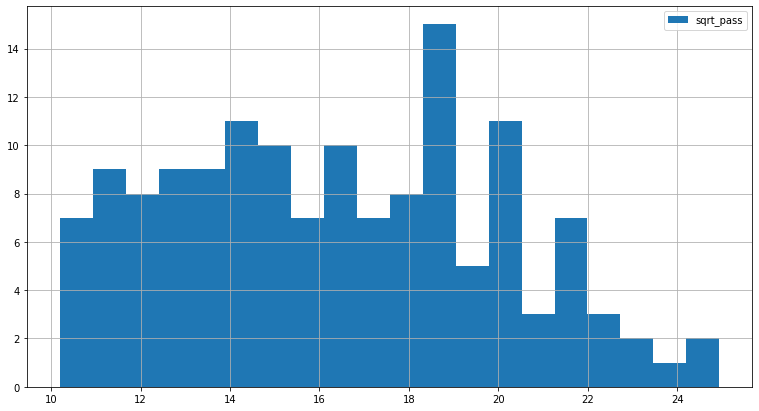

In [16]:
df.sqrt_pass.hist(bins=20, label='sqrt_pass')
plt.legend()

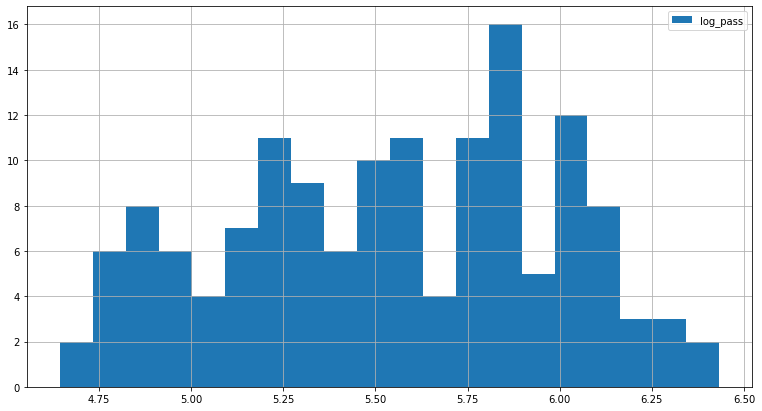

In [17]:
df.log_pass.hist(bins=20, label='log_pass')
plt.legend()

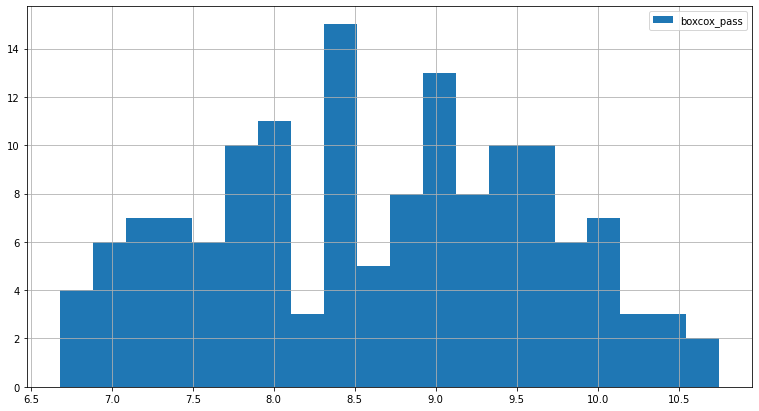

In [18]:
df.boxcox_pass.hist(bins=20, label='boxcox_pass')
plt.legend()

# Part 2 Forecasting Metrics

In [19]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [20]:
df2 = pd.read_csv("SPY.csv",index_col="Date",parse_dates=True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [21]:
# Forecasting using Naive model
df2['ClosePredict'] = df2.Close.shift(1)
df2.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePredict
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [22]:
y_true = df2.Close[1:]
y_pred = df2.ClosePredict[1:]

In [23]:
#SSE
#There is no inbuilt fuction
(y_true - y_pred).dot(y_true - y_pred)

6330.374289492605

In [24]:
#MSE
mean_squared_error(y_true,y_pred)

2.798573956451196

In [25]:
#RMSE
mean_squared_error(y_true,y_pred, squared=False)

1.672893886787562

In [26]:
#MAE
mean_absolute_error(y_true,y_pred)

1.1457559803120336

In [27]:
#MAPE
mean_absolute_percentage_error(y_true,y_pred)

0.006494073151422373

In [28]:
#SMAPE
def smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denomerator = (np.abs(y_true) + np.abs(y_pred))/2
    ratio = numerator / denomerator
    return ratio.mean()

smape(y_true,y_pred)

0.006491365814068418

In [29]:
#R2 -->Cofficient of determination
r2_score(y_true,y_pred)

0.9989603259063914

# Part 3  Exponential Smoothing

In [31]:
#SMA
df['sma'] = df.Passengers.rolling(window=10).mean()
df.tail()

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma
Month,,,,,
1960-08-01,606,24.617067,6.406880,10.684049,469.0
1960-09-01,508,22.538855,6.230481,10.234573,483.6
1960-10-01,461,21.470911,6.133398,9.992159,489.2
1960-11-01,390,19.748418,5.966147,9.582623,486.5
1960-12-01,432,20.784610,6.068426,9.831860,490.6


<AxesSubplot:xlabel='Month'>

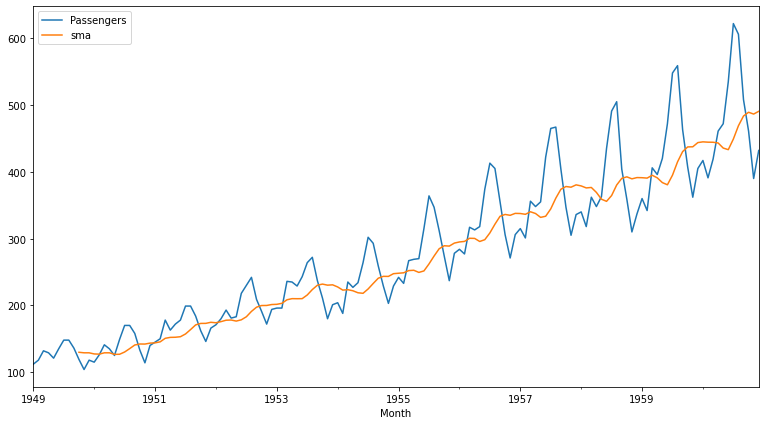

In [34]:
#plot sma
df[["Passengers","sma"]].plot()

In [44]:
#EWMA
df["ewma"] = df.Passengers.ewm(alpha=0.2,adjust=False).mean()
df.head()

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma
Month,,,,,,
1949-01-01,112,10.583005,4.718499,6.827490,NaN,112.0000
1949-02-01,118,10.862780,4.770685,6.932822,NaN,113.2000
1949-03-01,132,11.489125,4.882802,7.161892,NaN,116.9600
1949-04-01,129,11.357817,4.859812,7.114611,NaN,119.3680
1949-05-01,121,11.000000,4.795791,6.983787,NaN,119.6944


<AxesSubplot:xlabel='Month'>

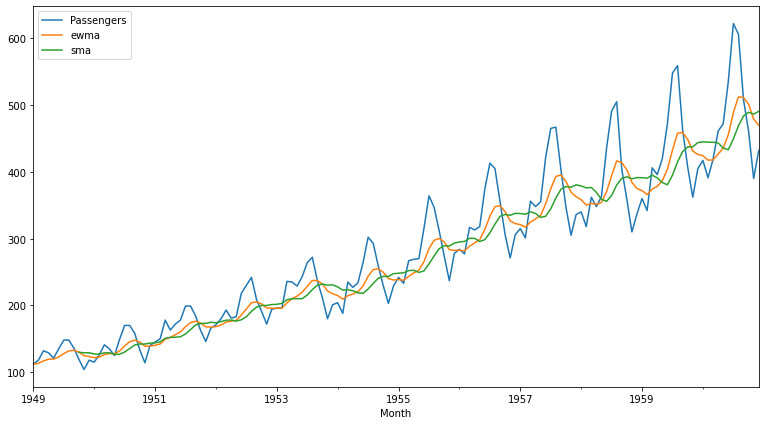

In [45]:
#plot ewma
df[["Passengers","ewma","sma"]].plot()

#### forecasting Models

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [64]:
#SES model
df.index.freq = "MS"
ses = SimpleExpSmoothing(df.Passengers)

In [65]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [66]:
result = ses.fit()

In [69]:
df['SES'] = result.predict('1949-01-01','1960-12-01')

In [71]:
np.allclose(df.SES,result.fittedvalues)

True

In [70]:
result.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    117.970000
1949-04-01    131.929850
1949-05-01    129.014649
                 ...    
1960-08-01    621.563424
1960-09-01    606.077817
1960-10-01    508.490389
1960-11-01    461.237452
1960-12-01    390.356187
Freq: MS, Length: 144, dtype: float64

In [72]:
df.SES

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    117.970000
1949-04-01    131.929850
1949-05-01    129.014649
                 ...    
1960-08-01    621.563424
1960-09-01    606.077817
1960-10-01    508.490389
1960-11-01    461.237452
1960-12-01    390.356187
Freq: MS, Name: SES, Length: 144, dtype: float64

<AxesSubplot:xlabel='Month'>

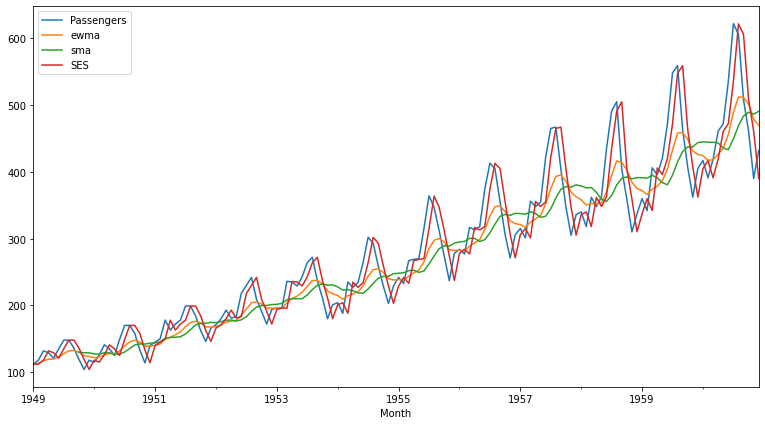

In [74]:
df[["Passengers","ewma","sma",'SES']].plot()

In [75]:
df.head()

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES
Month,,,,,,,
1949-01-01,112,10.583005,4.718499,6.827490,NaN,112.0000,112.000000
1949-02-01,118,10.862780,4.770685,6.932822,NaN,113.2000,112.000000
1949-03-01,132,11.489125,4.882802,7.161892,NaN,116.9600,117.970000
1949-04-01,129,11.357817,4.859812,7.114611,NaN,119.3680,131.929850
1949-05-01,121,11.000000,4.795791,6.983787,NaN,119.6944,129.014649


In [76]:
#now predict for last 12 months
n_test = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]
ses_model = SimpleExpSmoothing(train.Passengers).fit()

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [77]:
ses_model.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
ses_model.predict(test.index[0],test.index[-1])

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1960-01-01    404.786132
1960-02-01    404.786132
1960-03-01    404.786132
1960-04-01    404.786132
1960-05-01    404.786132
1960-06-01    404.786132
1960-07-01    404.786132
1960-08-01    404.786132
1960-09-01    404.786132
1960-10-01    404.786132
1960-11-01    404.786132
1960-12-01    404.786132
Freq: MS, dtype: float64

In [135]:
df.loc[test.index,'ses'] = ses_model.forecast(12)
df.tail(3)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES,ses,holt,holts_pred
Month,,,,,,,,,,
1960-10-01,461,21.470911,6.133398,9.992159,489.2,501.297019,508.490389,404.786132,510.986001,404.786132
1960-11-01,390,19.748418,5.966147,9.582623,486.5,479.037615,461.237452,404.786132,463.593235,404.786132
1960-12-01,432,20.784610,6.068426,9.831860,490.6,469.630092,390.356187,404.786132,392.767753,404.786132


<AxesSubplot:xlabel='Month'>

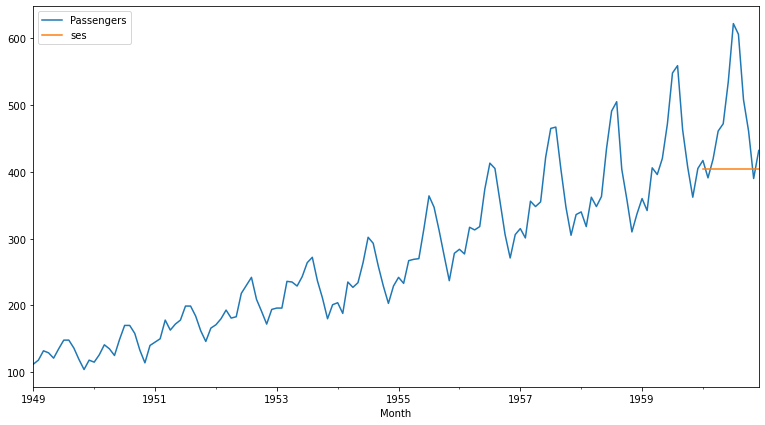

In [136]:
# plot the prediction
df[['Passengers', 'ses']].plot()
# It dosn't capture trend and seasionality 

In [150]:
#Holts Model
h_model = Holt(df.Passengers).fit()

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [151]:
np.allclose(h_model.fittedvalues,df.Passengers)

False

In [152]:
df['holt'] = h_model.fittedvalues
df.tail()

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES,ses,holt,holts_pred
Month,,,,,,,,,,
1960-08-01,606,24.617067,6.406880,10.684049,469.0,512.214093,621.563424,404.786132,623.568502,NaN
1960-09-01,508,22.538855,6.230481,10.234573,483.6,511.371274,606.077817,404.786132,608.358441,NaN
1960-10-01,461,21.470911,6.133398,9.992159,489.2,501.297019,508.490389,404.786132,510.986001,NaN
1960-11-01,390,19.748418,5.966147,9.582623,486.5,479.037615,461.237452,404.786132,463.593235,NaN
1960-12-01,432,20.784610,6.068426,9.831860,490.6,469.630092,390.356187,404.786132,392.767753,NaN


<AxesSubplot:xlabel='Month'>

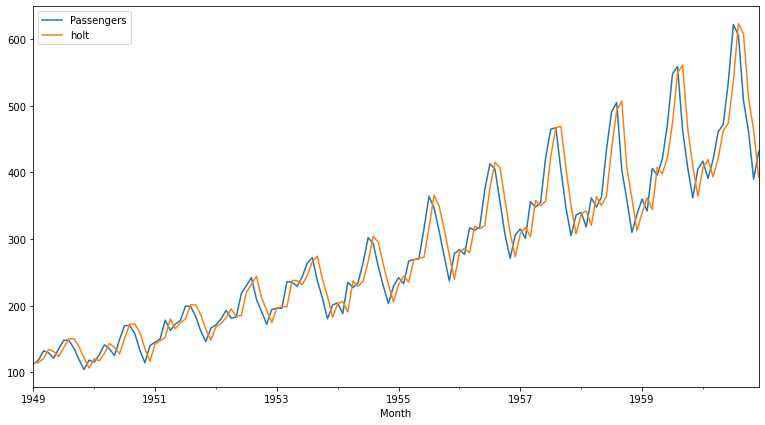

In [153]:
df[['Passengers', 'holt']].plot()

In [173]:
#now forecast by holts
h_model_pred = Holt(train.Passengers).fit()
df['holts_pred'] = h_model_pred.forecast(12);

In [174]:
df.tail()

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES,ses,holt,holts_pred
Month,,,,,,,,,,
1960-08-01,606,24.617067,6.406880,10.684049,469.0,512.214093,621.563424,404.786132,623.568502,424.000886
1960-09-01,508,22.538855,6.230481,10.234573,483.6,511.371274,606.077817,404.786132,608.358441,426.400973
1960-10-01,461,21.470911,6.133398,9.992159,489.2,501.297019,508.490389,404.786132,510.986001,428.801059
1960-11-01,390,19.748418,5.966147,9.582623,486.5,479.037615,461.237452,404.786132,463.593235,431.201146
1960-12-01,432,20.784610,6.068426,9.831860,490.6,469.630092,390.356187,404.786132,392.767753,433.601233


<AxesSubplot:xlabel='Month'>

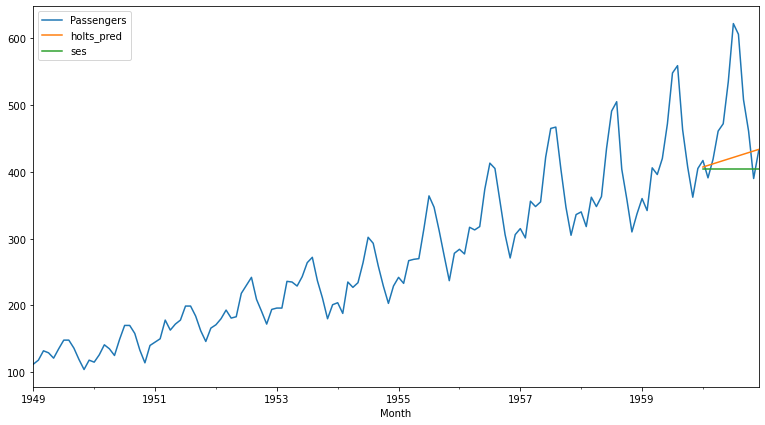

In [177]:
df[['Passengers', 'holts_pred','ses']].plot()

In [178]:
h_model_pred.params

{'smoothing_level': 0.9950719513349672,
 'smoothing_trend': 0.004467242315395386,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.91240163727467,
 'initial_trend': 2.5655284214159795,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [180]:
#Holt winters model
#Additive model
hw_add_model = ExponentialSmoothing(train.Passengers,trend='add',seasonal='add',seasonal_periods=12).fit()

In [182]:
df.loc[train.index,'hw_add'] = hw_add_model.fittedvalues
df.loc[test.index,'hw_add'] = hw_add_model.forecast(12)
df.head()

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES,ses,holt,holts_pred,hw_add
Month,,,,,,,,,,,
1949-01-01,112,10.583005,4.718499,6.827490,NaN,112.0000,112.000000,NaN,114.155500,NaN,112.113196
1949-02-01,118,10.862780,4.770685,6.932822,NaN,113.2000,112.000000,NaN,114.221156,NaN,120.218570
1949-03-01,132,11.489125,4.882802,7.161892,NaN,116.9600,117.970000,NaN,120.175837,NaN,134.735435
1949-04-01,129,11.357817,4.859812,7.114611,NaN,119.3680,131.929850,NaN,134.115056,NaN,131.429072
1949-05-01,121,11.000000,4.795791,6.983787,NaN,119.6944,129.014649,NaN,131.244976,NaN,124.635710


<AxesSubplot:xlabel='Month'>

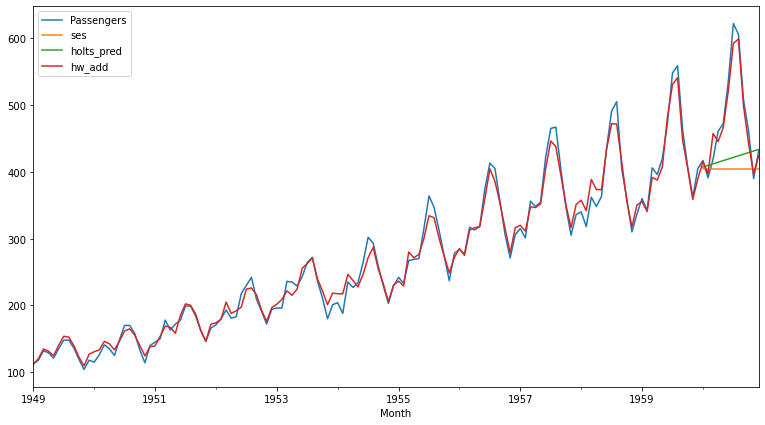

In [183]:
df[['Passengers', 'ses','holts_pred','hw_add']].plot()

In [184]:
df.tail(15)

,Passengers,sqrt_pass,log_pass,boxcox_pass,sma,ewma,SES,ses,holt,holts_pred,hw_add
Month,,,,,,,,,,,
1959-10-01,407,20.174241,6.008813,9.686136,437.3,448.522825,463.479715,NaN,465.967155,NaN,405.222957
1959-11-01,362,19.026298,5.891644,9.403432,437.5,431.218260,407.282399,NaN,409.659666,NaN,358.544573
1959-12-01,405,20.124612,6.003887,9.674151,443.8,425.974608,362.226412,NaN,364.567911,NaN,389.775030
1960-01-01,417,20.420578,6.033086,9.745317,444.9,424.179686,404.786132,404.786132,406.893629,407.200279,415.453282
1960-02-01,391,19.773720,5.968708,9.588817,444.4,417.543749,416.938931,404.786132,419.128117,409.600366,397.086416
1960-03-01,419,20.469489,6.037871,9.757008,444.3,417.834999,391.129695,404.786132,393.419735,412.000453,457.468194
1960-04-01,461,21.470911,6.133398,9.992159,443.2,426.467999,418.860648,404.786132,421.008725,414.400539,445.365703
1960-05-01,472,21.725561,6.156979,10.050720,435.6,435.574399,460.789303,404.786132,462.901705,416.800626,466.183989
1960-06-01,535,23.130067,6.282267,10.365311,433.2,455.459520,471.943947,404.786132,474.140462,419.200713,520.727681


In [185]:
hw_add_model.params

{'smoothing_level': 0.2511208117084883,
 'smoothing_trend': 1.3699489016031072e-08,
 'smoothing_seasonal': 0.7488791202590951,
 'damping_trend': nan,
 'initial_level': 217.94935028769095,
 'initial_trend': 2.5572900942746166,
 'initial_seasons': array([-108.39344441, -102.81693451,  -90.30023072,  -95.47695898,
        -104.21762072,  -90.14847472,  -77.97164947,  -80.41631954,
         -94.6046602 , -113.50692099, -128.15227238, -111.8351178 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [187]:
#Holt winters model
#multicative model
hw_mul_model = ExponentialSmoothing(train.Passengers,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [189]:
df.loc[train.index,'hw_mul'] = hw_mul_model.fittedvalues
df.loc[test.index,'hw_mul'] = hw_mul_model.forecast(12)

<AxesSubplot:xlabel='Month'>

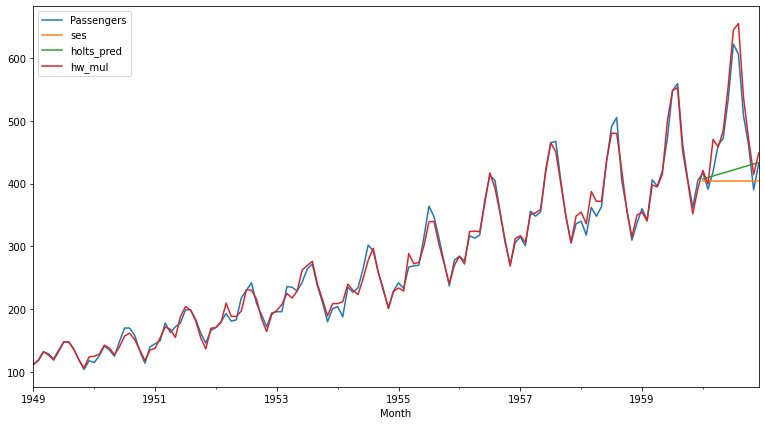

In [191]:
df[['Passengers', 'ses','holts_pred','hw_mul']].plot()

In [192]:
hw_mul_model.params

{'smoothing_level': 0.367086081098585,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.6127583905294022,
 'damping_trend': nan,
 'initial_level': 208.80776159225817,
 'initial_trend': 1.0102975821917333,
 'initial_seasons': array([0.53057741, 0.55940048, 0.61770522, 0.58647448, 0.54051602,
        0.59410668, 0.65032467, 0.64297144, 0.58504429, 0.50757183,
        0.44935453, 0.52292427]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

(-132.0, -109.0)

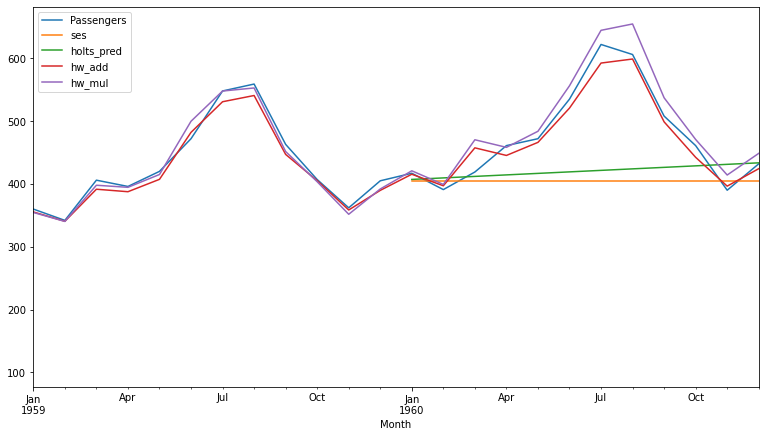

In [194]:
df[['Passengers', 'ses','holts_pred','hw_add','hw_mul']].plot()
plt.xlim("1959-01-01",'1960-12-01')


# Part 4 ARIMA and related

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df["diff_pass"] = df.Passengers.diff(periods=1)

In [6]:
df['log_pass'] = np.log(df.Passengers)


<AxesSubplot:xlabel='Month'>

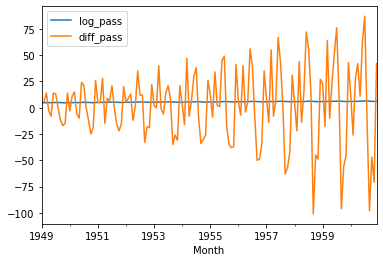

In [7]:
df[["log_pass","diff_pass"]].plot()

<AxesSubplot:xlabel='Month'>

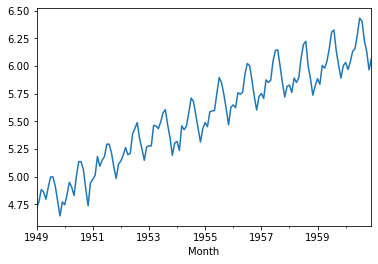

In [8]:
df.log_pass.plot()

<AxesSubplot:xlabel='Month'>

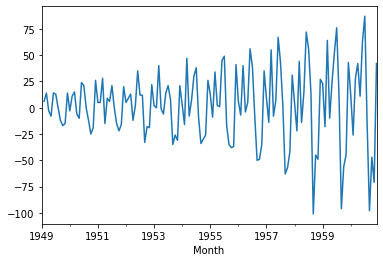

In [9]:
df.diff_pass.plot()

In [10]:
from scipy.stats import boxcox

In [11]:
df['boxcox_pass'],lmda = boxcox(df.Passengers)

<AxesSubplot:xlabel='Month'>

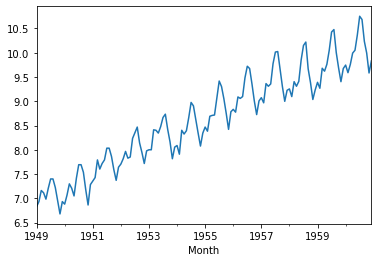

In [12]:
df.boxcox_pass.plot()

<AxesSubplot:xlabel='Month'>

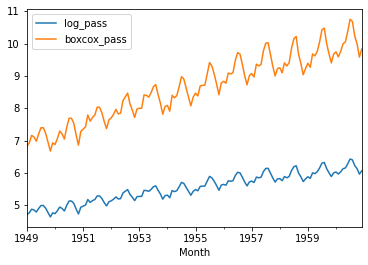

In [13]:
df[["log_pass","boxcox_pass"]].plot()

In [14]:
df.head()

,Passengers,diff_pass,log_pass,boxcox_pass
Month,,,,
1949-01-01,112,NaN,4.718499,6.827490
1949-02-01,118,6.0,4.770685,6.932822
1949-03-01,132,14.0,4.882802,7.161892
1949-04-01,129,-3.0,4.859812,7.114611
1949-05-01,121,-8.0,4.795791,6.983787


In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
df.index.freq = "MS"

In [17]:
n_pred = 12
train_data = df.iloc[:-n_pred]
test_data = df.iloc[-n_pred:]

#### ARIMA(1,0,0) ie AR(1)

In [18]:
arima_result = ARIMA(train_data.Passengers,order=(1,0,0)).fit()

In [19]:
df.loc[train_data.index,"AR(1)"] = arima_result.predict(train_data.index[0],train_data.index[-1])

In [20]:
# to get prediction and interval
pred_result = arima_result.get_forecast(12) 
df.loc[test_data.index,'AR(1)'] = pred_result.predicted_mean

<AxesSubplot:xlabel='Month'>

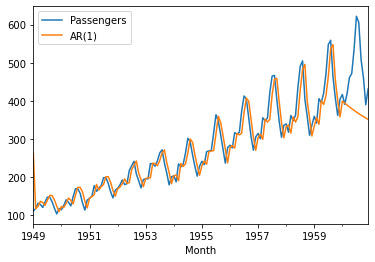

In [21]:
df[["Passengers","AR(1)"]].plot()

In [22]:
pred_result.conf_int()[:2]

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354


In [23]:
#plot with confi int
def plot_fit_and_forecast(result):
    fig ,ax = plt.subplots(figsize=(15,7))
    ax.plot(df.Passengers,label= "data")
    #plot curve fitted to train data
    ax.plot(train_data.index,result.fittedvalues,label= "fitted")
    # plot the test data
    pred_result = result.get_forecast(n_pred)
    ax.plot(test_data.index, pred_result.predicted_mean,label='forecast',c = 'green')
    #plot interval
    conf_int = pred_result.conf_int()
    ax.fill_between(test_data.index,conf_int["lower Passengers"], conf_int["upper Passengers"],color ="green",alpha = 0.3)
    ax.legend()

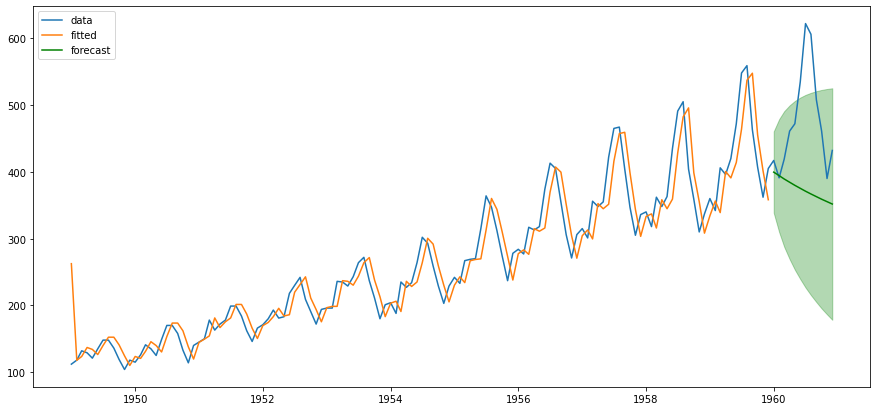

In [24]:
plot_fit_and_forecast(arima_result)

#### ARIMA(10,0,0) AR(10)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


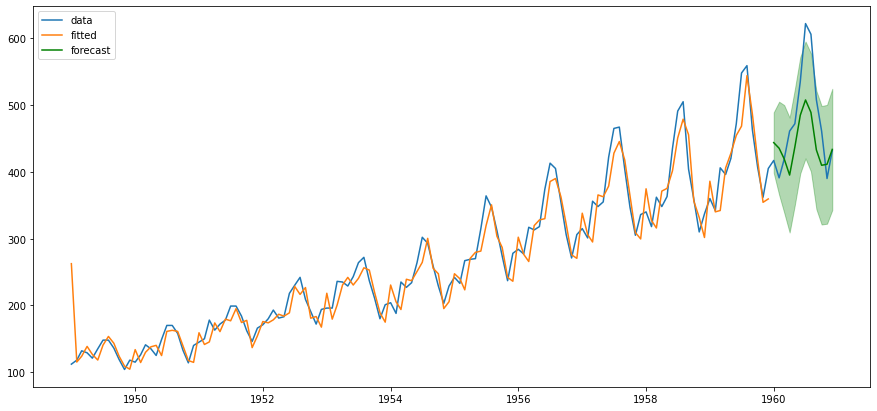

In [25]:
arima_result_10 = ARIMA(train_data.Passengers,order=(10,0,0)).fit()
plot_fit_and_forecast(arima_result_10)

##### ARIMA(12,0,0) AR(12)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


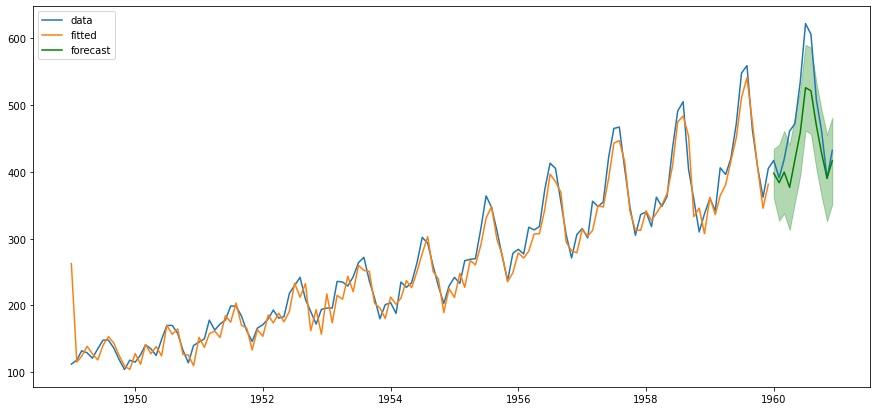

In [26]:
arima_result_12 = ARIMA(train_data.Passengers,order=(12,0,0)).fit()
plot_fit_and_forecast(arima_result_12)

##### ARIMA(0,0,12) MA(12)

In [27]:
arima_result_ma = ARIMA(train_data.Passengers,order=(0,0,12)).fit()

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


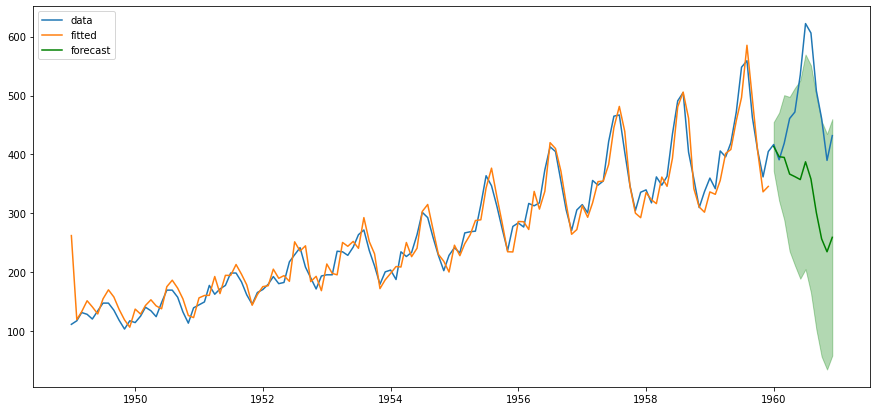

In [28]:
plot_fit_and_forecast(arima_result_ma)

##### ARIMA(12,0,12) ARMA

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


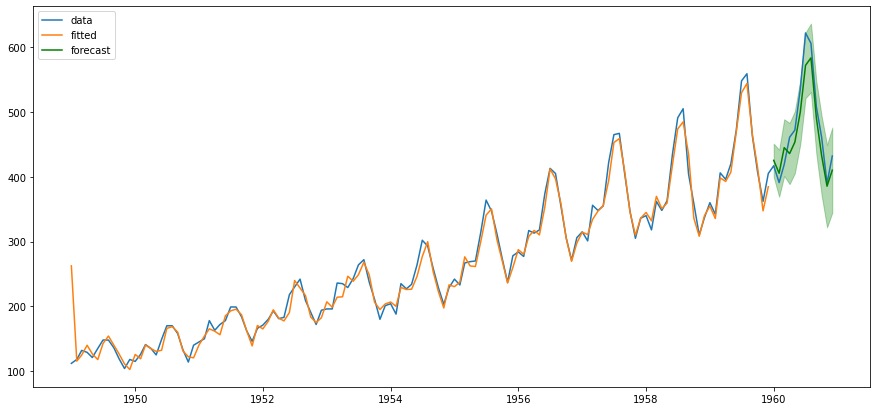

In [29]:
arima_result_ARMA = ARIMA(train_data.Passengers,order=(12,0,12)).fit()
plot_fit_and_forecast(arima_result_ARMA)

###### ARIMA(1,1,1)

In [30]:
arima_1_1_1 = ARIMA(train_data.Passengers, order=(1,1,1)).fit()

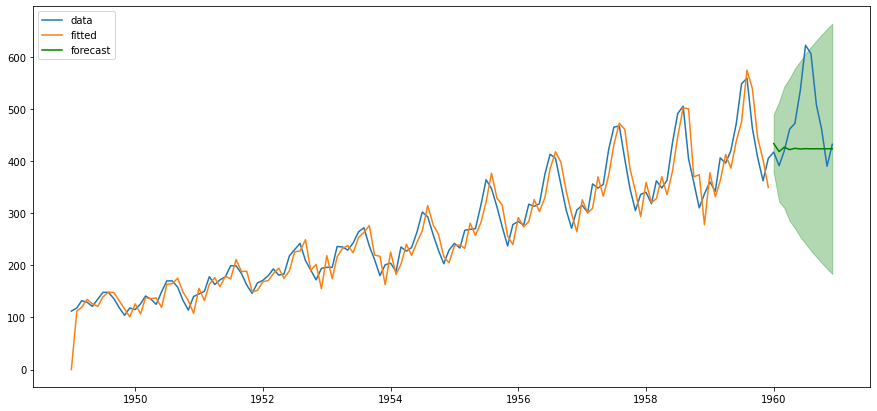

In [31]:
plot_fit_and_forecast(arima_1_1_1)

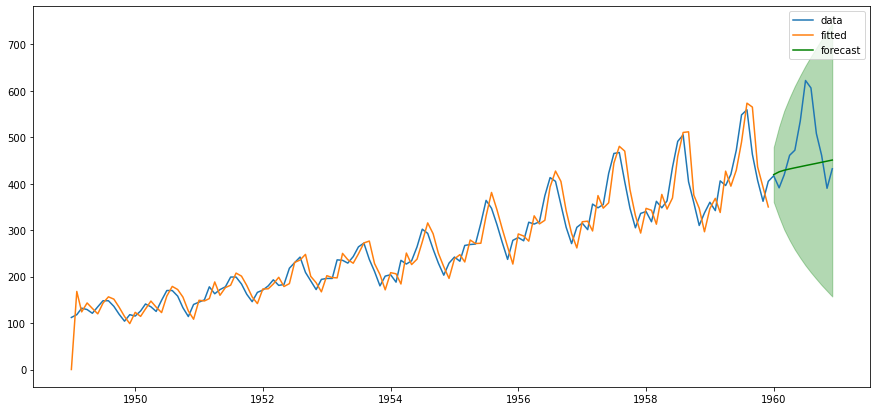

In [32]:
# ARIMA(1,2,1)
arima_1_2_1 = ARIMA(train_data.Passengers, order=(1,2,1)).fit()
plot_fit_and_forecast(arima_1_2_1)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


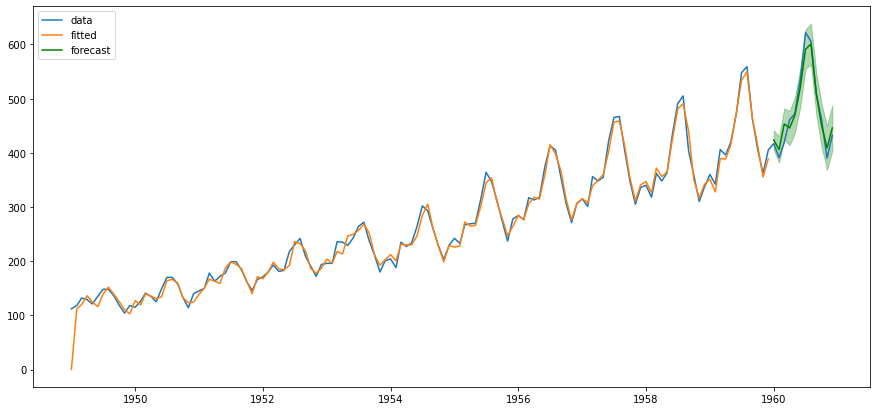

In [33]:
# ARIMA(12,1,12)
arima_12_1_12 = ARIMA(train_data.Passengers, order=(12,1,12)).fit()
plot_fit_and_forecast(arima_12_1_12)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


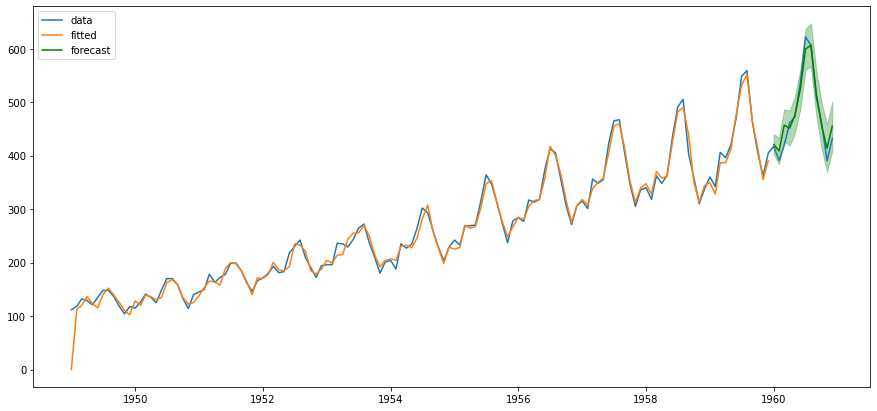

In [34]:
# ARIMA(12,1,6)
arima_12_1_6 = ARIMA(train_data.Passengers, order=(12,1,6)).fit()
plot_fit_and_forecast(arima_12_1_6)

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


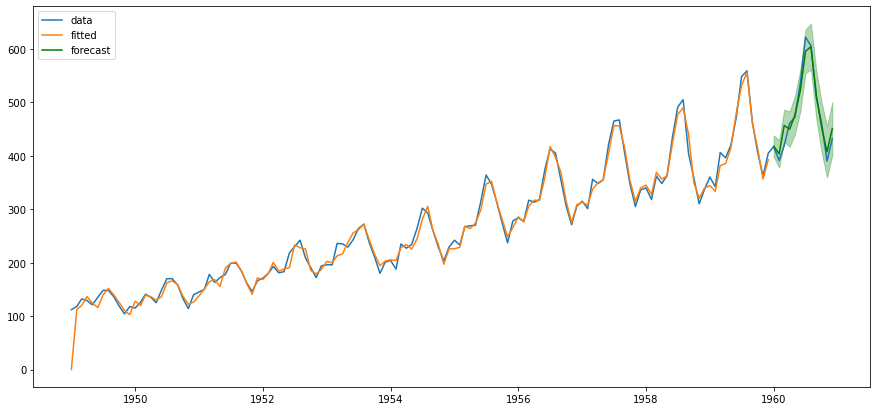

In [35]:
# ARIMA(12,1,1)
arima_12_1_1 = ARIMA(train_data.Passengers, order=(12,1,1)).fit()
plot_fit_and_forecast(arima_12_1_1)

In [36]:
arima_result_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:               ARIMA(12, 0, 12)   Log Likelihood                -519.109
Date:                Sat, 30 Jul 2022   AIC                           1090.218
Time:                        19:38:13   BIC                           1165.171
Sample:                    01-01-1949   HQIC                          1120.675
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.4929    564.086      0.465      0.642    -843.095    1368.081
ar.L1          0.1362      0.416      0.328      0.743      -0.679       0.951
ar.L2         -0.0964      0.444     -0.217      0.828      -0.966       0.774
ar.L3          0.0899      0.419      0.214      0.830      -0.732       0.911
ar.L4         -0.0422      0.405     -0.104      0.917      -0.835       0.751
ar.L5          0.0776      0.383      0.202      0.840      -0.674       0.829
ar.L6         -0.0867      0.386     -0.225      0.822      -0.843       0.670
ar.L7          0.0832      0.384      0.217      0.828      -0.669       0.835
ar.L8         -0.0972      0.390     -0.249      0.803      -0.862       0.667
ar.L9          0.0429      0.390      0.110      0.912      -0.722       0.808
ar.L10        -0.0631      0.362     -0.174      0.862      -0.774       0.647
ar.L11         0.0825      0.375      0.220      0.826      -0.653       0.818
ar.L12         0.8606      0.385      2.235      0.025       0.106       1.615
ma.L1          0.8375      0.923      0.907      0.364      -0.972       2.648
ma.L2          0.8958      1.301      0.688      0.491      -1.655       3.446
ma.L3          0.5365      1.529      0.351      0.726      -2.460       3.533
ma.L4          0.2654      1.057      0.251      0.802      -1.807       2.338
ma.L5          0.3778      0.313      1.208      0.227      -0.235       0.991
ma.L6          0.3769      0.900      0.419      0.675      -1.387       2.141
ma.L7          0.5480      1.699      0.323      0.747      -2.782       3.878
ma.L8          0.7045      1.988      0.354      0.723      -3.192       4.601
ma.L9          0.9158      1.909      0.480      0.631      -2.825       4.656
ma.L10         0.6576      1.358      0.484      0.628      -2.004       3.320
ma.L11         0.5963      0.837      0.712      0.476      -1.044       2.237
ma.L12         0.1521      0.345      0.441      0.660      -0.524       0.829
sigma2       171.5801    153.419      1.118      0.263    -129.116     472.276
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.21   Prob(JB):                         0.45
Heteroskedasticity (H):               2.42   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
f"sqrt of arima_12_1_1 ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_12_1_1.forecast(n_pred)))}"

C:\Users\Public\Documents\iSkysoft\CreatorTemp/ipykernel_11836/391930305.py:1: RuntimeWarning: invalid value encountered in sqrt
  f"sqrt of arima_12_1_1 ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_12_1_1.forecast(n_pred)))}"


'sqrt of arima_12_1_1 ===  nan'

In [45]:
f"sqrt of arima_1_1_1 ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_1_1_1.forecast(n_pred)))}"

'sqrt of arima_1_1_1 ===  7.224570299925919'

In [46]:
f"sqrt of arima_1_2_1 ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_1_2_1.forecast(n_pred)))}"

'sqrt of arima_1_2_1 ===  6.250162944999973'

In [47]:
f"sqrt of arima_result ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_result.forecast(n_pred)))}"

'sqrt of arima_result ===  10.101692651846907'

In [48]:
f"sqrt of arima_result_ARMA ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_result_ARMA.forecast(n_pred)))}"

'sqrt of arima_result_ARMA ===  3.8126024138243806'

In [49]:
f"sqrt of arima_result_12 ===  {np.sqrt(np.mean(test_data.Passengers  -  arima_result_12.forecast(n_pred)))}"

'sqrt of arima_result_12 ===  6.630511567376774'

In [50]:
# check for stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Passengers)
# non stationary

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [51]:
adfuller(df.log_pass)

(-1.7170170891069714,
 0.4223667747703857,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [52]:
#plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

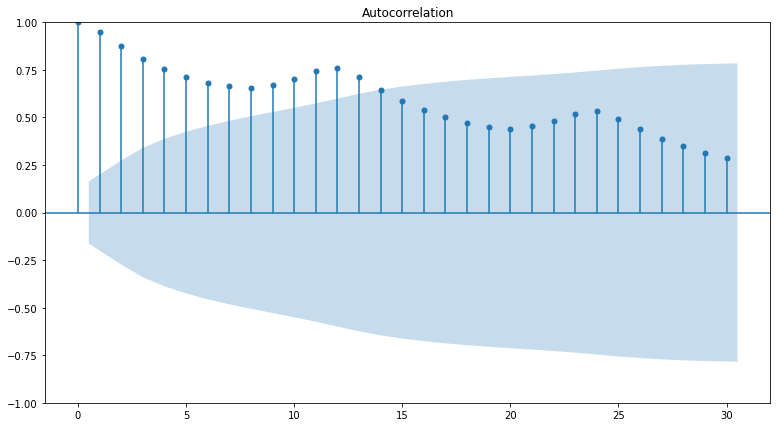

In [58]:
plot_acf(df.Passengers,lags=30);

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


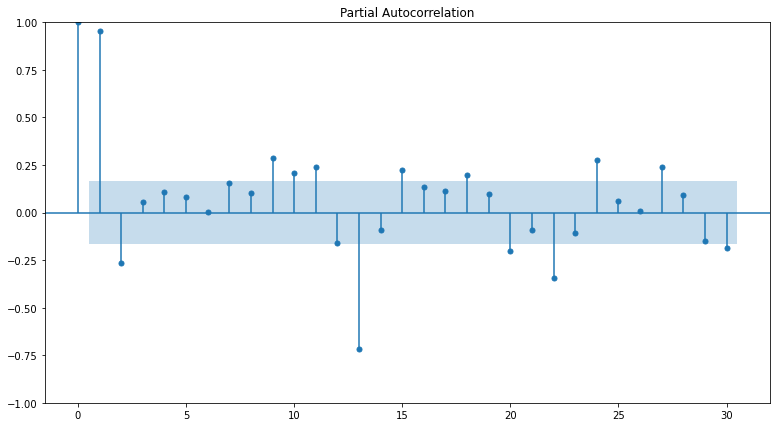

In [59]:
plot_pacf(df.Passengers,lags=30);

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

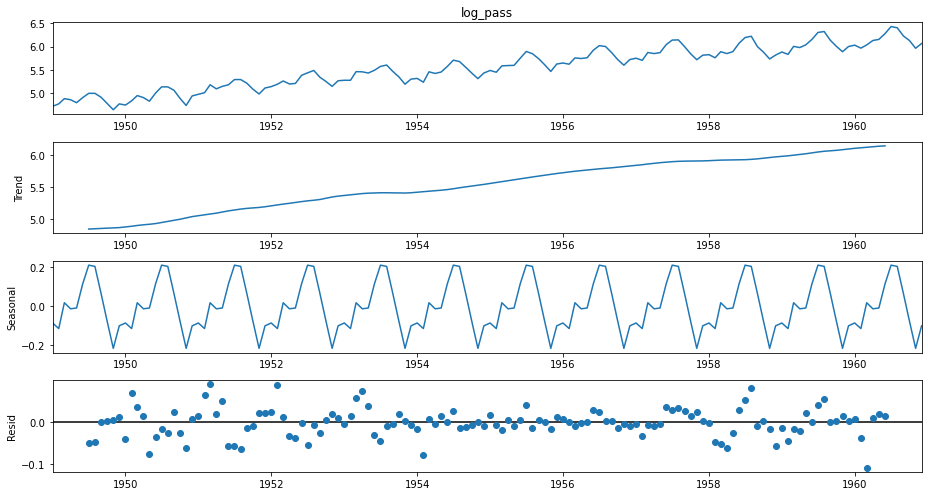

In [61]:
decompose_data = seasonal_decompose(df.log_pass,model='additive')
decompose_data.plot();

<AxesSubplot:ylabel='Frequency'>

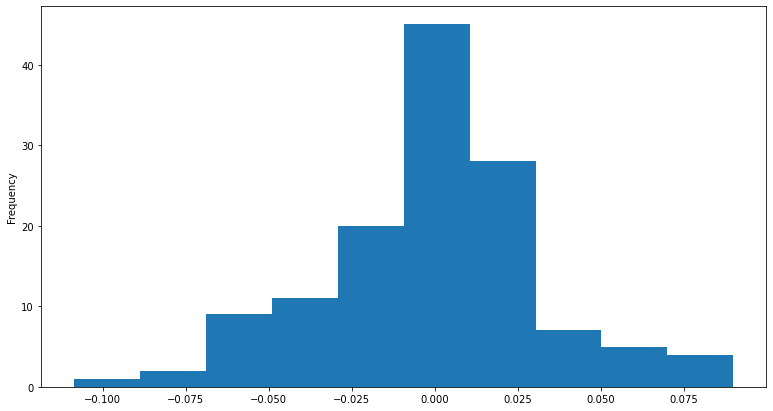

In [63]:
decompose_data.resid.plot(kind='hist')

In [103]:
# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [115]:
sarimax_model_2 = SARIMAX( train_data.Passengers,order=(8, 1, 2),seasonal_order=(6,1,1,12)).fit()

C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Mirz\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
sarimax_model.params

ar.L1       -0.496684
ma.L1        0.257196
ar.S.L12    -0.999487
ma.S.L12     0.989335
sigma2      98.208894
dtype: float64

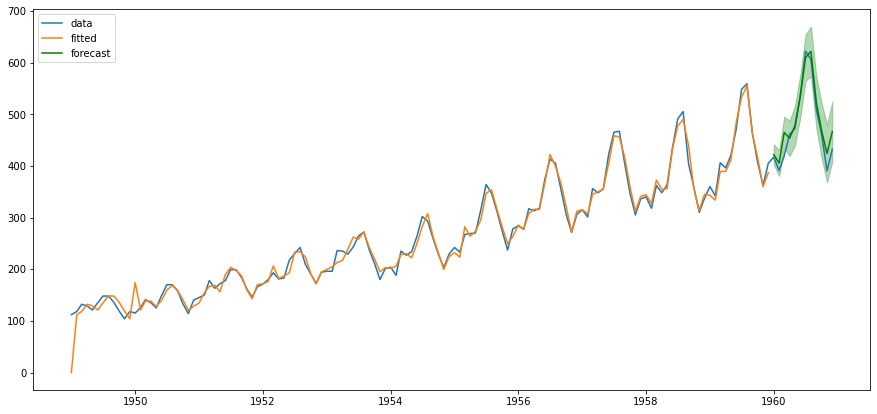

In [79]:
plot_fit_and_forecast(sarimax_model)

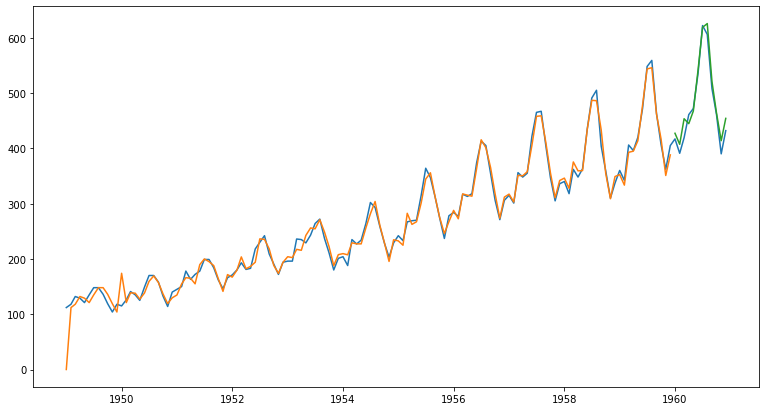

In [117]:
fig , ax = plt.subplots() 
ax.plot(df.Passengers)
ax.plot(sarimax_model_2.fittedvalues)
ax.plot(sarimax_model_2.forecast(12))

In [116]:
sarimax_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                  132
Model:             SARIMAX(8, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -434.911
Date:                              Sun, 31 Jul 2022   AIC                            905.822
Time:                                      09:15:51   BIC                            955.846
Sample:                                  01-01-1949   HQIC                           926.135
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2891      0.261     -4.936      0.000      -1.801      -0.777
ar.L2         -0.9665      0.319     -3.031      0.002      -1.592      -0.341
ar.L3         -0.3006      0.211     -1.424      0.154      -0.714       0.113
ar.L4         -0.3505      0.224     -1.565      0.117      -0.789       0.088
ar.L5         -0.3349      0.224     -1.495      0.135      -0.774       0.104
ar.L6         -0.0933      0.217     -0.430      0.667      -0.519       0.332
ar.L7          0.0381      0.215      0.178      0.859      -0.383       0.459
ar.L8         -0.0875      0.153     -0.572      0.567      -0.387       0.212
ma.L1          1.0327      0.277      3.733      0.000       0.490       1.575
ma.L2          0.7420      0.241      3.081      0.002       0.270       1.214
ar.S.L12      -0.7288      0.900     -0.810      0.418      -2.493       1.036
ar.S.L24      -0.1647      0.304     -0.541      0.588      -0.761       0.432
ar.S.L36       0.1273      0.131      0.971      0.331      -0.130       0.384
ar.S.L48       0.3898      0.223      1.749      0.080      -0.047       0.827
ar.S.L60       0.4484      0.336      1.333      0.183      -0.211       1.108
ar.S.L72       0.3652      0.216      1.692      0.091      -0.058       0.788
ma.S.L12       0.3666      1.042      0.352      0.725      -1.675       2.408
sigma2        76.1751     15.365      4.958      0.000      46.061     106.290
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.86   Prob(JB):                         0.78
Heteroskedasticity (H):               1.59   Skew:                             0.01
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""